## Loan Data Analysis

In [2]:
#Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
#load dataset into dataframe
df = pd.read_csv('prosperLoanData.csv')

In [4]:
print(df.shape)
print(df.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [5]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
df.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [7]:
df.StatedMonthlyIncome.min()

0.0

In [8]:
df.StatedMonthlyIncome.max()

1750002.916667

In [9]:
df.MonthlyLoanPayment.describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

In [10]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [11]:
df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [12]:
df[df.EmploymentStatus.isna()].count()

ListingKey                     2255
ListingNumber                  2255
ListingCreationDate            2255
CreditGrade                    2255
Term                           2255
                               ... 
PercentFunded                  2255
Recommendations                2255
InvestmentFromFriendsCount     2255
InvestmentFromFriendsAmount    2255
Investors                      2255
Length: 81, dtype: int64

In [13]:
df.EmploymentStatus = df.EmploymentStatus.fillna('Not available')

In [14]:
df.Occupation.value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [15]:
df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)

In [16]:
df.dtypes

ListingKey                             object
ListingNumber                           int64
ListingCreationDate            datetime64[ns]
CreditGrade                            object
Term                                    int64
                                    ...      
PercentFunded                         float64
Recommendations                         int64
InvestmentFromFriendsCount              int64
InvestmentFromFriendsAmount           float64
Investors                               int64
Length: 81, dtype: object

### What is the structure of your dataset?

There are 113,937 different loans in listed in this dataset with data on many factors regarding the loan (such as interest rate and length of the loan), as well as information on the borrower (such as occupation and employment status)

### What is/are the main feature(s) of interest in your dataset?

It would be interesting to explore the loan status and see whether loan demographics or borrower demographics have a larger impact on whether a loan ends up defaulting. For this dataset, we will disregard late payments, but only look at loans that are either completed, defaulted or current on their payments.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I suspect the borrower demographics (such as Prosper Score and the number of investors) will have a greater correlation with whether loans default than loan demographics (such as loan term length and interest rates for the borrower on the loan), so I will look at those features in this investigation.

## Univariate Exploration

In [17]:
#All the people with no stated monthly income
df[df['StatedMonthlyIncome'] == 0.0].StatedMonthlyIncome.count()
df_noinc = df[df['StatedMonthlyIncome'] == 0.0]

(0, 100000)

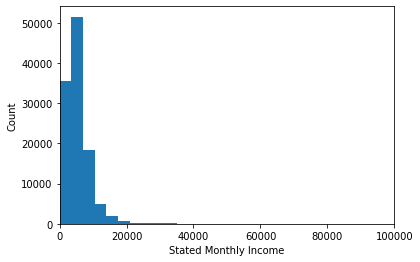

In [18]:
plt.hist(data=df, x='StatedMonthlyIncome', bins=500);
plt.xlabel('Stated Monthly Income')
plt.ylabel('Count')
plt.xlim(0,100000)

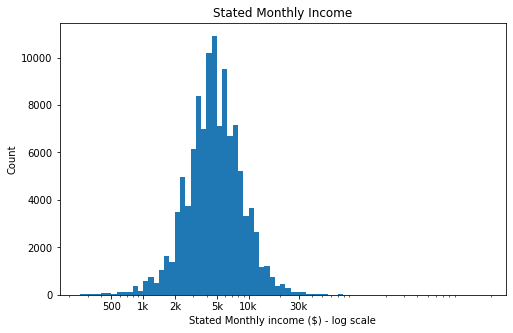

In [19]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(df['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 3e4], [500, '1k', '2k', '5k', '10k', '30k'])
plt.xlabel('Stated Monthly income ($) - log scale')
plt.ylabel('Count')
plt.title('Stated Monthly Income')
plt.show()

Stated Monthly Income for the borrower has a distribution with a long tail with a lot of stated monthly incomes on the lower end and few on the higher end. When plotted on a log scale, the distribution looks unimodal with a peak at around 4k on the log scale

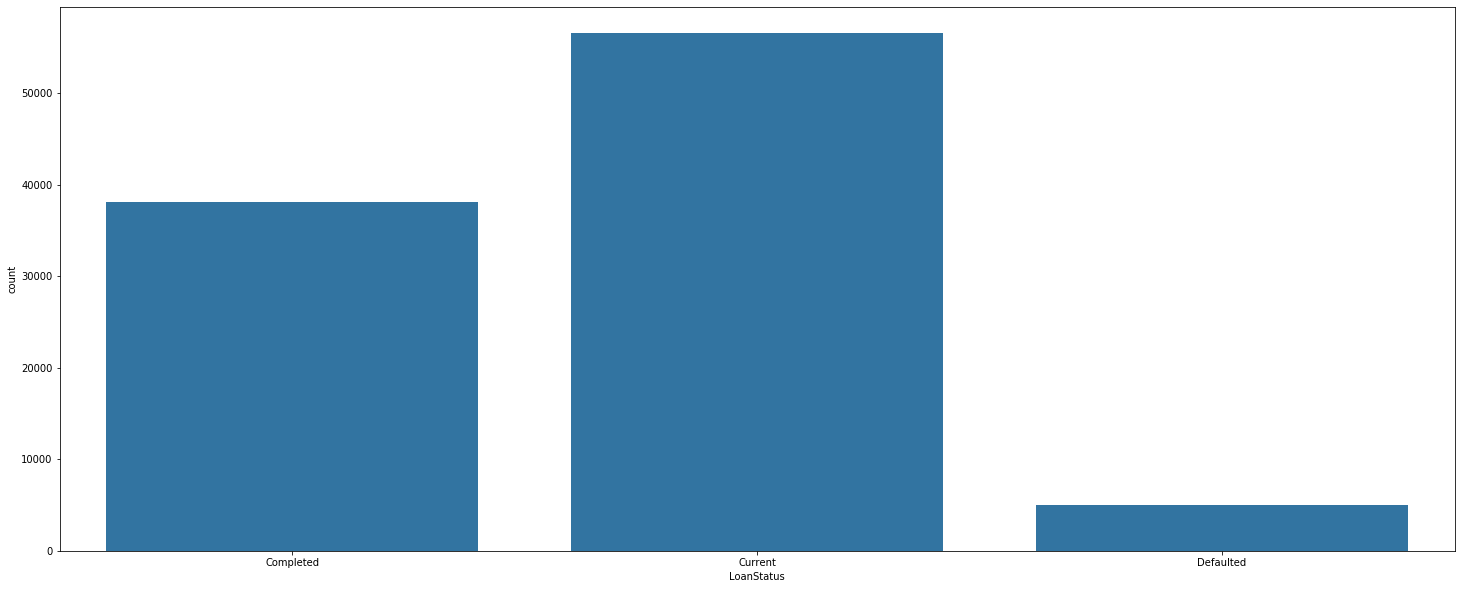

In [20]:
col_order = ['Completed', 'Current', 'Defaulted']
base_color = sns.color_palette()[0]
plt.figure(figsize=[25, 10])
sns.countplot(data = df, x = 'LoanStatus', color = base_color, order=col_order)

Text(0.5, 1.0, 'Distribution of Prosper Score')

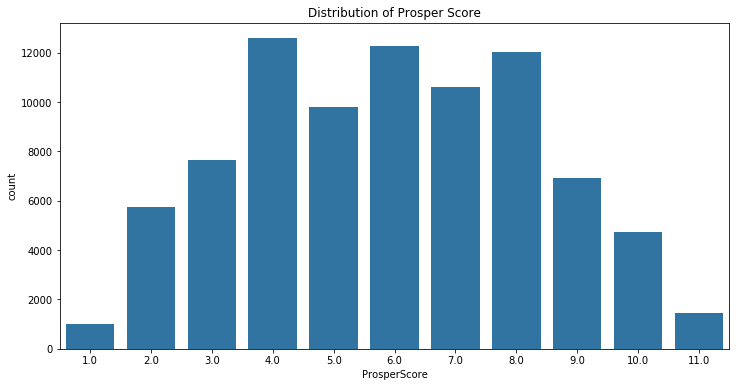

In [21]:
base_color = sns.color_palette()[0]
plt.figure(figsize=[12, 6])
sns.countplot(data = df, x = 'ProsperScore', color = base_color)
plt.title('Distribution of Prosper Score')

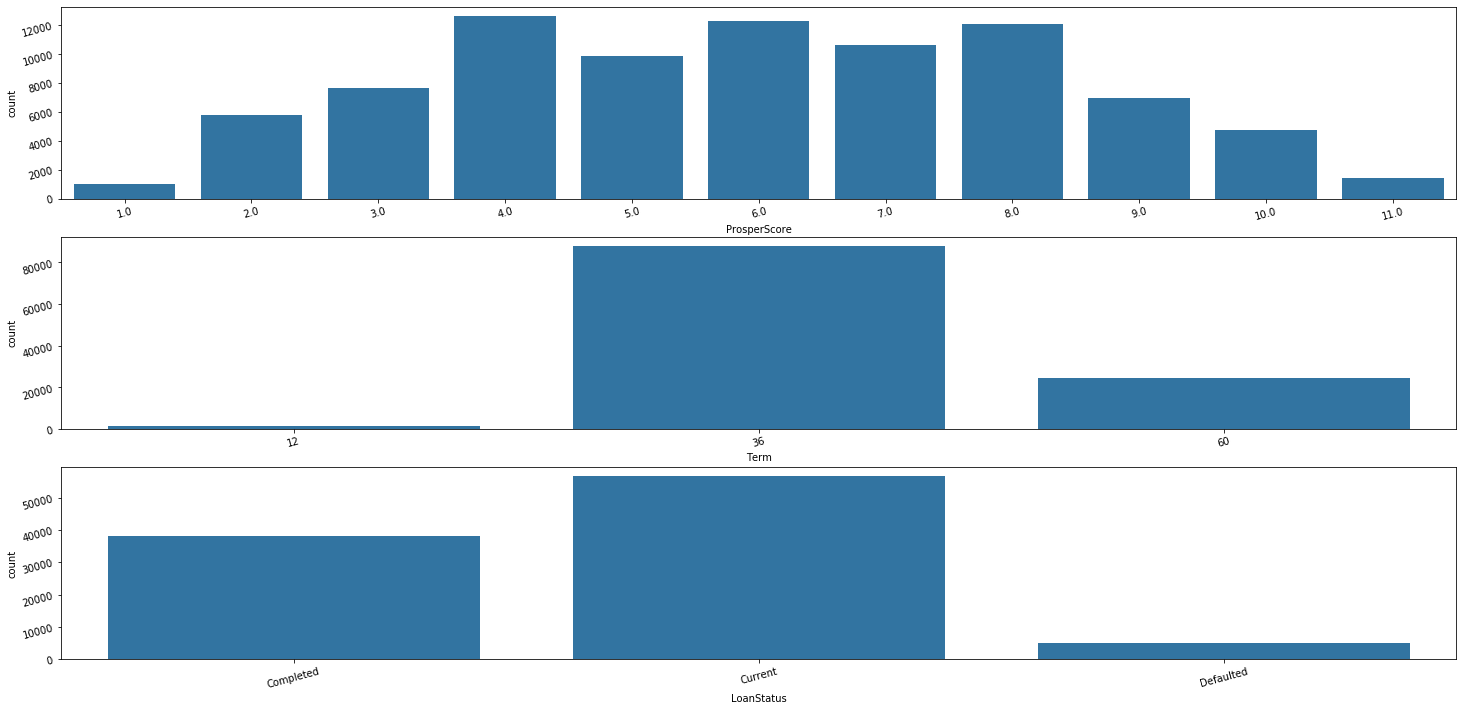

In [22]:
# let's plot all three together to get an idea of each ordinal variable's distribution.
col_order = ['Completed', 'Current', 'Defaulted']

fig, ax = plt.subplots(nrows=3, figsize = [25,12])

default_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'ProsperScore', color = default_color, ax = ax[0])
sns.countplot(data = df, x = 'Term', color = default_color, ax = ax[1])
sns.countplot(data = df, x = 'LoanStatus', color = default_color, order=col_order, ax = ax[2])

for ax in fig.axes:
    ax.tick_params(labelrotation=15)

plt.show()

It looks like a majority of loans have a term of 36 months and borrowers tend to have a salary in the $25-75k range

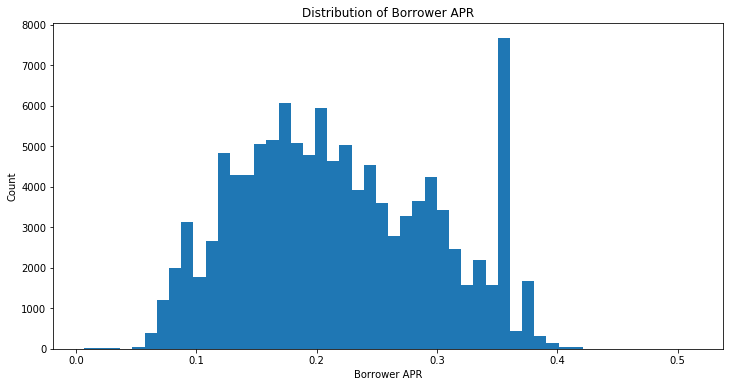

In [48]:
#plot of Borrower APR distribution
plt.figure(figsize=[12, 6])
plt.hist(data=df, x='BorrowerAPR', bins=50);
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title('Distribution of Borrower APR');

In [26]:
# convert IncomeRange into ordered categorical types
ordinal_var_dict = {'IncomeRange': ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999',
                                    '$50,000-74,999','$75,000-99,999','$100,000+'], 
                    'LoanStatus' : ['Current','Completed','Chargedoff','Cancelled','Defaulted','FinalPaymentInProgress',                                                                                                
                                    'Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)',
                                    'Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)']
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [27]:
df['IncomeRange'] = df.IncomeRange.astype('category')
df['LoanStatus'] = df.LoanStatus.astype('category')

In [28]:
df.IncomeRange.dtypes

CategoricalDtype(categories=['Not displayed', 'Not employed', '$0', '$1-24,999',
                  '$25,000-49,999', '$50,000-74,999', '$75,000-99,999',
                  '$100,000+'],
                 ordered=True)

In [29]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

Text(0.5, 1.0, 'Income Brackets for Loan Applicants')

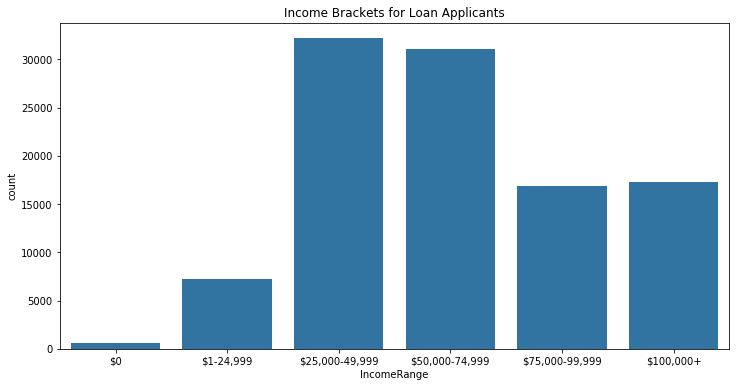

In [30]:
inc_order = ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
base_color = sns.color_palette()[0]
plt.figure(figsize=[12, 6])
sns.countplot(data = df, x = 'IncomeRange', color = base_color, order=inc_order)
plt.title('Income Brackets for Loan Applicants')

In [31]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

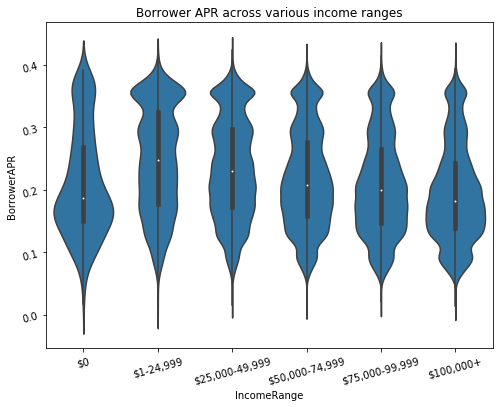

In [32]:
#plot income of the borrower vs. the APR that the borrower receives
inc_order = ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
base_color = sns.color_palette()[0]
plt.figure(figsize = [8, 6])
sns.violinplot(data=df, x='IncomeRange', y='BorrowerAPR', order=inc_order, color=base_color);
plt.tick_params(labelrotation=15)
plt.title('Borrower APR across various income ranges');

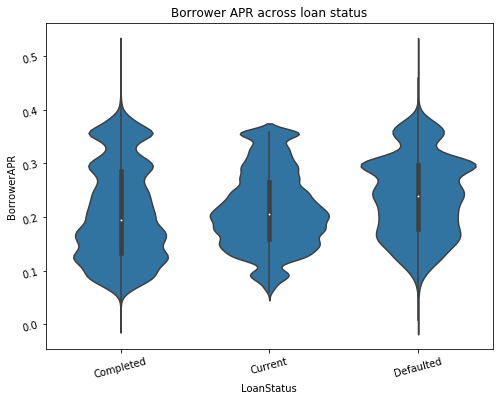

In [49]:
#plot income of the borrower vs. the APR that the borrower receives
col_order = ['Completed', 'Current', 'Defaulted']

base_color = sns.color_palette()[0]
plt.figure(figsize = [8, 6])
sns.violinplot(data=df, x='LoanStatus', y='BorrowerAPR', order=col_order, color=base_color);
plt.tick_params(labelrotation=15)
plt.title('Borrower APR across loan status');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

It is interesting to note that the shape of the distribution of ProsperScores is seemingly symmetric, and that there is less ratings in the 5 or 7 category.

Also, we see that the distribution of Stated Monthly Income of the borrower is extremely right skewed due to the fact that there are a few borrowers that have an extremely large income in comparison to most borrowers. So, in order to clearly visualize this data, we need to apply a log transform on the distribution. Once the transform is applied, we see that the data is unimodal.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Some of the categorical variables were not ordered in a very clear way, including the income range for the borrower as well as the status of the loan, so I organized them a clearer way based on ordinality.

I took a log transform of the Stated Monthly Income to visualize it better at it had a long tail with a few outliers (people who had a very large income in comparison to the rest that skewed the data and made it difficult to see trends)

## Bivariate Exploration

Start off with looking at Pairwise correlations of the data

In [33]:
numeric_vars = ['MonthlyLoanPayment', 'Recommendations', 'StatedMonthlyIncome', 'InvestmentFromFriendsAmount', 'Investors', 'BorrowerAPR']
categoric_vars = ['BorrowerState', 'LoanStatus', 'IncomeRange', 'Term']

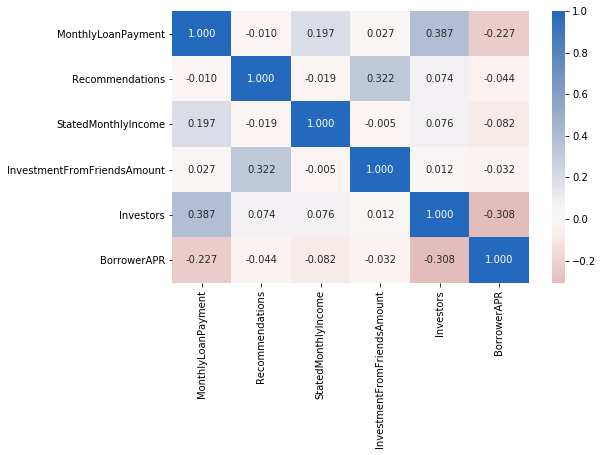

In [34]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

Something interesting to note from this heatmap is that the strongest correlation is the relationship between investors and monthly loan payment, and that it is positive, meaning that these may be related with one another.

Also, we see that there is very little correlation between the stated monthly income of the borrower and the investment that they receive from friends.

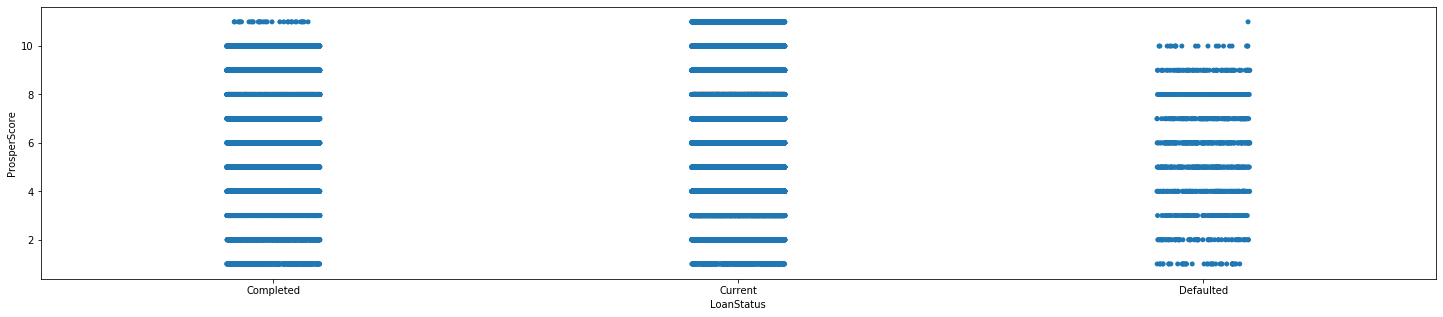

In [39]:
col_order = ['Completed', 'Current', 'Defaulted']
base_color = sns.color_palette()[0]
plt.figure(figsize=[25, 5])
sns.stripplot(x="LoanStatus", y="ProsperScore", data=df, color=base_color, order=col_order, jitter=True, dodge=True)

In [40]:
df[df['LoanStatus'] == 'Defaulted'].ProsperScore.mean()

5.619900497512438

In [41]:
df[df['LoanStatus'] == 'Completed'].ProsperScore.mean()

6.536513425549227

## Multivariate Exploration

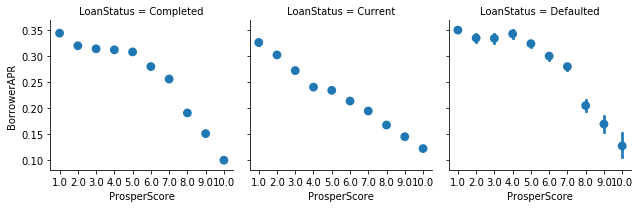

In [42]:
col_order = ['Completed', 'Current', 'Defaulted']
g = sns.FacetGrid(data = df, col = 'LoanStatus', col_order = col_order)
g.map(sns.pointplot, 'ProsperScore', 'BorrowerAPR', linestyles = '', order = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
plt.show()

We see here that when we compare loans that defaulted with current loans, we see that Borrower APR tended to be higher regardless of the Prosper Score of the Borrower. This is interesting to note as we try to determine what factors may be contributing to whether or not a loan defaults.

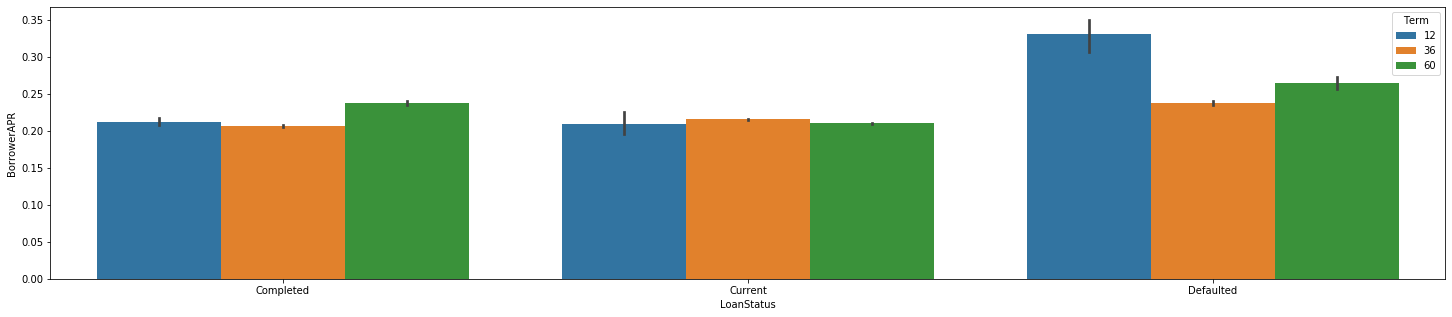

In [43]:
col_order = ['Completed', 'Current', 'Defaulted']
fig_dims = (25, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="LoanStatus", y="BorrowerAPR", hue="Term", data=df, order=col_order, ax=ax);

Something interesting to note from this plot is that regardless of the term of the loan, Borrower APR tended to be higher for loans that defaulted vs. those that were current or completed, though it is seen most significantly among the short term (12 month long) loans, where the APR for defaulted loans is significantly higher.

This is different from the results obtained when we looked at the relationship between loan status and Borrower APR only.

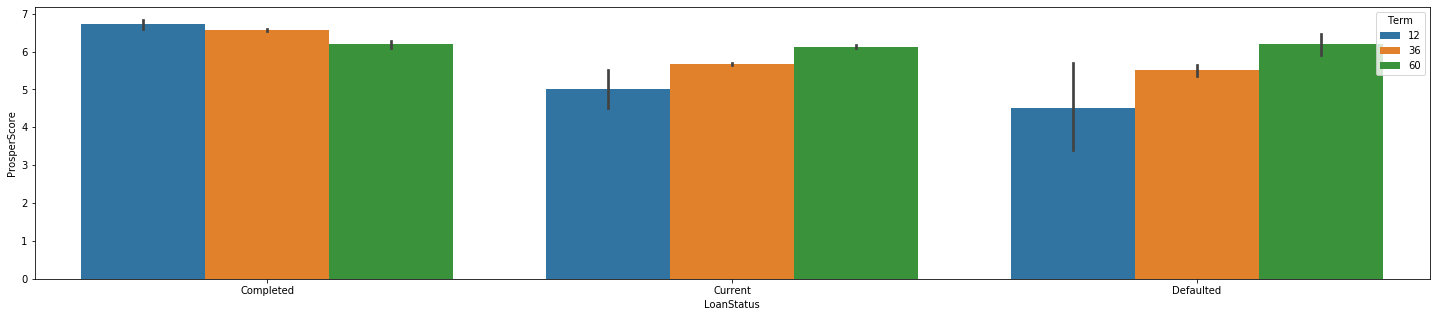

In [44]:
col_order = ['Completed', 'Current', 'Defaulted']
fig_dims = (25, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="LoanStatus", y="ProsperScore", hue="Term", data=df, order=col_order, ax=ax);

When looking at ProsperScore, however, we see a very interesting phenomenon. For 60 month loans, the Prosper Score tends to be pretty similar regardless of whether a loan defaults or not. So it doesn't seem like it would be a good indicator to determine if a loan will default in the long term, though for short term loans, will still see the Prosper Score tends to be lower for loans that default.

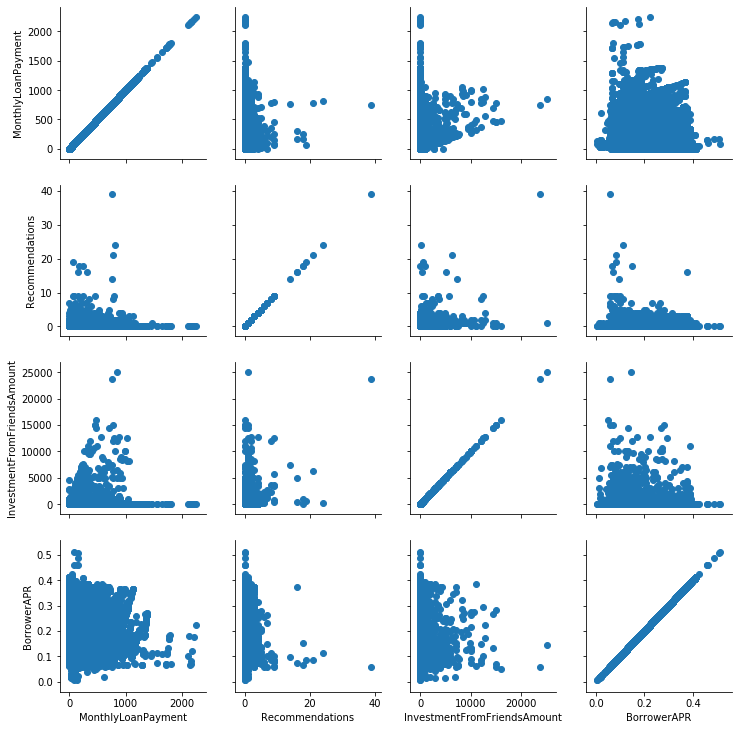

In [45]:
numeric_vars = ['MonthlyLoanPayment', 'Recommendations', 'InvestmentFromFriendsAmount', 'BorrowerAPR']
categoric_vars = ['BorrowerState', 'LoanStatus', 'IncomeRange', 'Term']

g= sns.PairGrid(data=df, vars=numeric_vars)
g.map(plt.scatter);

Something interesting to see in this plot is that it seems that there is a slightly negative correlation between the number of recommendations that a borrower receives and the amount of investment that they receive from friends. This seems counterintuitive as we would expect that people would want to invest more in loans that have more recommendations, but this is not the case.

#### Factors by State

Something else of interest is to see if the location of the borrower has any affect on if a loan defaults. Since there are several states to look at and it would difficult to visualize them all, we will look only at the top 4 states with the most amount of loans.

In [46]:
df.BorrowerState.value_counts().head()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
Name: BorrowerState, dtype: int64

According to the above, the four states with the most loans are California, Texas, New York, and Florida. So we will look at loans in those states.

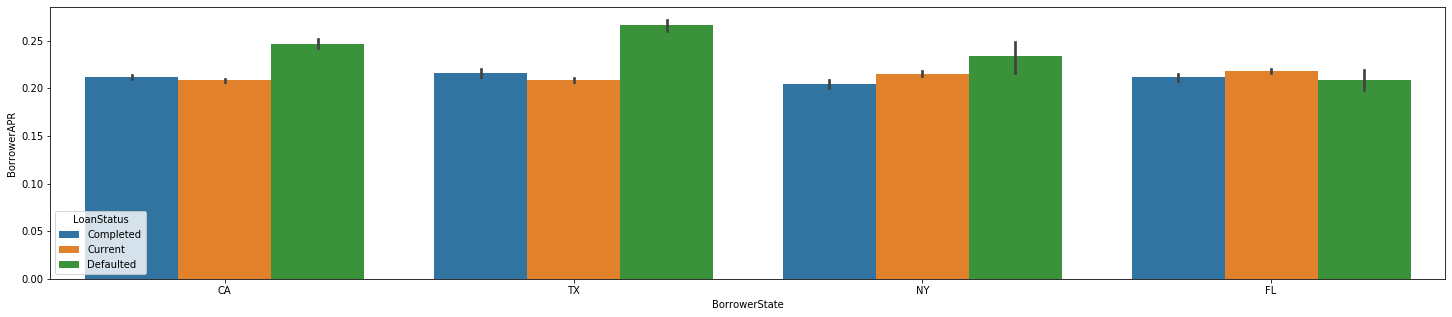

In [47]:
states = ['CA','TX','NY','FL']
col_order = ['Completed', 'Current', 'Defaulted']
fig_dims = (25, 5)
fig, ax = plt.subplots(figsize=fig_dims)

#default_color = sns.color_palette()[0]
sns.barplot(data = df, x = 'BorrowerState', y = 'BorrowerAPR', hue='LoanStatus', order=states, hue_order=col_order, ax=ax)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Of all the factors observed throughout this investigation, the one that seemed to have the most effect on whether a loan defaulted or not was the term of the loan, though these differences may be more pronounced because of the fact that there are not nearly as many 12 month loans as compared to the longer ones

### Were there any interesting or surprising interactions between features?

There was an interesting anomaly that occured when loans were broken up by term within different loan statuses. The 12 month loans for defaulted loans had an unusually high Borrower APR (on average) in comparison to Completed and Current loans of the same term. This is not very clearly seen when just looking at loan status and APR by themselves.